In [7]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [8]:
df = pd.read_csv("../data/ChungCheonDC/CompositeETCdata.csv")
df_DC = pd.read_csv("../data/ChungCheonDC/CompositeDCdata.csv")
df_DCstd = pd.read_csv("../data/ChungCheonDC/CompositeDCstddata.csv")

In [9]:
# missininds = np.arange(df_DC[electrodeID[elecind]].values.size)[np.isnan(df_DC[electrodeID[elecind]].values)]
electrodeID = df_DC.keys()[1:-1]

2015-07-22


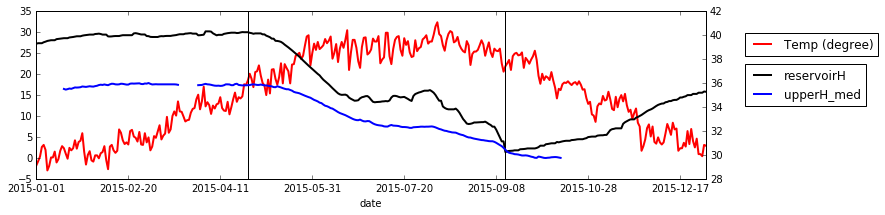

In [10]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='upperH_med', ax=ax1_1, color='b', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='Temp (degree)', ax=ax1, color='r', linestyle='-', lw=2)
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
itime_ref0 = 255
itime_ref1 = 115
ax1.plot(np.r_[itime_ref0, itime_ref0], np.r_[-5, 35], 'k-')
ax1.plot(np.r_[itime_ref1, itime_ref1], np.r_[-5, 35], 'k-')
print df['date'].values[itime_ref]

In [8]:
print pd_reservoirH[2]

NameError: name 'pd_reservoirH' is not defined

In [13]:
from ipywidgets import interact, IntSlider, ToggleButtons
itime = 93
itime_ref = 202
print df['date'].values[itime]
elecind = [53, 110, 300]
# vizDCtimeSeries(elecind, itime, itime_ref, ['k','b','r'])
viz = lambda idatum, itime, flag: vizDCtimeSeries([idatum], itime, itime_ref, ['r'], flag)
interact(viz, idatum=IntSlider(min=0, max=379, step=1, value=294)\
         ,itime=IntSlider(min=0, max=360, step=1, value=200)\
         ,flag=ToggleButtons(options=["std", "rho"]))

NameError: global name 'vizDCtimeSeries' is not defined

<function __main__.<lambda>>

C:\Users\sungkeun\Anaconda2\lib\site-packages\pandas\tools\plotting.py:929: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


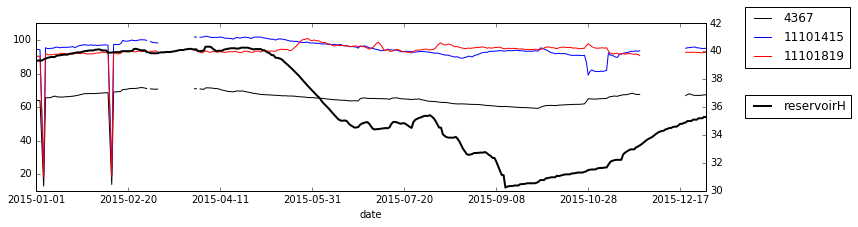

In [7]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df_DC.plot(figsize=(12,3), x='date', y=electrodeID[elecind], ax=ax1, colors=['k', 'b', 'r'])
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
ax1.set_yscale('linear')

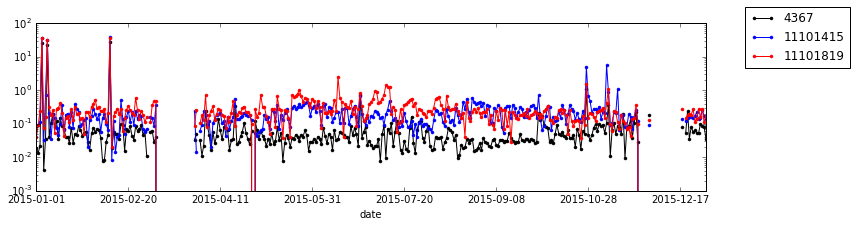

In [8]:
ax1 = plt.subplot(111)
df_DCstd.plot(figsize=(12,3), x='date', y=electrodeID[elecind], ax=ax1, colors=['k', 'b', 'r'], linestyle="-", marker='.', lw=1)
ax1.set_yscale('log')
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))

In [9]:
sys.path.append("../codes/")
from DCdata import readReservoirDC_all
directory = "../data/ChungCheonDC/"
dat_temp,height_temp, ID = readReservoirDC_all(directory+"20151231180000.apr")

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    


In [10]:
from scipy import interpolate
locs = dat_temp[:,:4]
mida = locs[:,:2].sum(axis=1)
midb = locs[:,2:].sum(axis=1)
mid = (mida + midb)*0.5
dz = mida-midb
x = np.linspace(mid.min(), mid.max(), 100)
z = np.linspace(dz.min(), dz.max(), 100)
grid_x, grid_z = np.meshgrid(x,z)

def vizDCtimeSeries(idatum, itime, itime_ref, colors, flag):
    fig = plt.figure(figsize = (12, 12))
    ax1 = plt.subplot(411)
    ax2 = plt.subplot(412)
    
    valsratio = df_DC[electrodeID].values[itime,:].flatten() / df_DC[electrodeID].values[itime_ref,:].flatten()
    valsDC = np.log10(df_DC[electrodeID].values[itime,:].flatten())
    valsDCstd = df_DCstd[electrodeID].values[itime,:].flatten()
    grid_rho_ratio = griddata(mid, dz, valsratio, grid_x, grid_z, interp='linear')
    grid_rho_ratio = grid_rho_ratio.reshape(grid_x.shape)
    if flag =="std":
        vmin, vmax = 0, 10
        grid_rho = griddata(mid, dz, valsDCstd, grid_x, grid_z, interp='linear')        
    elif flag =="rho":
        vmin, vmax = np.log10(20), np.log10(200)
        grid_rho = griddata(mid, dz, valsDC, grid_x, grid_z, interp='linear')
    grid_rho = grid_rho.reshape(grid_x.shape)
        
    
    ax1.contourf(grid_x, grid_z, grid_rho, 200, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")    
    vmin, vmax = 0.9, 1.1
    ax2.contourf(grid_x, grid_z, grid_rho_ratio, 200, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")        
    ax1.scatter(mid, dz, s=20, c = valsDC, edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
    ax1.plot(mid, dz, 'k.')
    ax2.scatter(mid, dz, s=20, c = valsratio, edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
    ax2.plot(mid, dz, 'k.')
    
    for i in range(len(colors)):
        ax1.plot(mid[idatum[i]], dz[idatum[i]], 'o', color=colors[i])    
        ax2.plot(mid[idatum[i]], dz[idatum[i]], 'o', color=colors[i])    
        

    ax3 = plt.subplot(413)
    ax3_1 = ax3.twinx()
    df.plot(x='date', y='reservoirH', ax=ax3_1, color='k', linestyle='-', lw=2)
    df.plot(x='date', y='upperH_med', ax=ax3_1, color='b', linestyle='-', lw=2)
    df.plot(x='date', y='Temp (degree)', ax=ax3, color='r', linestyle='-', lw=2)
    df.plot(x='date', y='Rainfall (mm)', ax=ax3, color='b', linestyle='-', marker="o", ms=4)
    ax3.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
    ax3_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
    itime_ref0 = itime_ref
    itime_ref1 = itime
    ax3.plot(np.r_[itime_ref0, itime_ref0], np.r_[-5, 40], 'k--', lw=2)
    ax3.plot(np.r_[itime_ref1, itime_ref1], np.r_[-5, 40], 'k--', lw=2)

    ax4 = plt.subplot(414)
    df_DC.plot(x='date', y=electrodeID[idatum], ax=ax4)
    ax4.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
    ax4.set_yscale('log')
    temp = df_DC[electrodeID[elecind]].values
    vmax = np.median(temp[~np.isnan(temp)]) + np.std(temp[~np.isnan(temp)])*3
    vmin = np.median(temp[~np.isnan(temp)]) - np.std(temp[~np.isnan(temp)])*3
    ax4.plot(np.r_[itime_ref1, itime_ref1], np.r_[vmin, vmax], 'k--', lw=2)
    ax4.plot(np.r_[itime_ref0, itime_ref0], np.r_[vmin, vmax], 'k--', lw=2)
    
    ax4.set_ylim(vmin, vmax)
    

In [3]:
print df_reservoirH

NameError: name 'df_reservoirH' is not defined

In [1]:
import numpy as np

a = np.random.random(((5,3,3))); # example of what real input will look like

# create 2D flattened version of 3D input array
d1,d2,d3 = a.shape
b = np.zeros([d1,d2*d3])
for i in range(len(a)):
  b[i] = a[i].flatten()

print "shape of 3D array: ", a.shape
print "shape of flattened 2D array: ", b.shape, "\n"
print "flattened 2D array:\n", b, "\n"

# mean-center the flattened array
b -= np.mean(b, axis=0)

# calculate the covariance matrix of the flattened array
covar1 = np.cov(b, rowvar=0)   # this makes a 9x9 array
covar2 = np.dot(b, b.T)        # this makes a 5x5 array

print "covariance via numpy.cov:\n", covar1, "\n"
print "covariance via numpy.dot:\n", covar2, "\n"

# calculate eigenvalues and eigenvectors
eval1, evec1 = np.linalg.eig(covar1)
eval2, evec2 = np.linalg.eig(covar2)

print "eigenvalues via numpy.cov covariance matrix:\n", eval1, "\n"
print "eigenvectors via numpy.cov covariance matrix:\n", evec1, "\n"
print "eigenvalues via numpy.dot covariance matrix:\n", eval2, "\n"
print "eigenvectors via numpy.dot covariance matrix:\n", evec2, "\n"


shape of 3D array:  (5L, 3L, 3L)
shape of flattened 2D array:  (5L, 9L) 

flattened 2D array:
[[ 0.1610976   0.53408452  0.92564432  0.79417234  0.95817541  0.70043539
   0.80378572  0.83962233  0.04476981]
 [ 0.53964821  0.7019235   0.53174998  0.61080967  0.26941622  0.87936852
   0.2673331   0.93888042  0.15430463]
 [ 0.612724    0.40047046  0.82678424  0.95936799  0.70751275  0.54988299
   0.44828535  0.15883392  0.31543301]
 [ 0.35573653  0.59093642  0.16894013  0.79057648  0.87794153  0.61850889
   0.74833471  0.86277261  0.57514702]
 [ 0.65810902  0.42367822  0.59150756  0.78926301  0.96411273  0.50754312
   0.16847888  0.9854812   0.05101293]] 

covariance via numpy.cov:
[[  4.22449824e-02  -8.68311540e-03  -6.27972348e-03   2.54321964e-03
   -1.95152308e-02  -9.26667705e-03  -5.21132406e-02  -1.68327847e-02
   -2.25244311e-03]
 [ -8.68311540e-03   1.53424004e-02  -1.62882517e-02  -1.31533465e-02
   -2.28111198e-02   1.64585028e-02   4.58324358e-03   2.28099778e-02
    3.806949

In [2]:
 import numpy as np
 x=np.random.normal(size=25)
>>> y=np.random.normal(size=25)
>>> np.cov(x,y)
array([[ 0.77568388,  0.15568432],
       [ 0.15568432,  0.73839014]])

NameError: name 'array' is not defined

In [3]:
 x=np.random.normal(size=25)

In [4]:
y=np.random.normal(size=25)

In [5]:
np.cov(x,y)

array([[ 1.19685995,  0.06473121],
       [ 0.06473121,  1.14174912]])

In [ ]:
import pylab
import random
import math


random.seed = 1

x1 = [1,4,7,8]
y1 = [1,3,5,7]


print "Mean of x is", pylab.mean(x1)
print "Sample variance of x is", pylab.var(x1,ddof=1)
print "Sample SD of x is", pylab.std(x1,ddof=1)
print "Mean of y is", pylab.mean(y1)
print "Sample variance of y is", pylab.var(y1,ddof=1)
print "Sample SD of y is", pylab.std(y1,ddof=1)

print "Correlation of X and Y is", pylab.corrcoef(x1,y1)

pylab.scatter(x1,y1,c="blue",marker="s")
pylab.xlabel("Variable X",size='x-large')
pylab.ylabel("Variable Y",size='x-large')
pylab.title("Scatter plot of two variables",size='x-large')
pylab.savefig("scatterXYExample.png")
pylab.show()


pylab.scatter(x1,y1,c="blue",marker="s")
pylab.xlabel("Variable X",size='x-large')
pylab.ylabel("Variable Y",size='x-large')
pylab.title("Scatter plot of two variables",size='x-large')
pylab.axhline(y=4)
pylab.axvline(x=5)
pylab.annotate('Mean of X = 5',
               xy=(5, 6),
               xycoords='data',
               xytext=(2,6),
               size='large',
               arrowprops=dict(arrowstyle="->"),
               ha='center',
               va='center')
pylab.annotate('Mean of Y = 4',
               xy=(7, 4),
               xycoords='data',
               xytext=(7,2),
               size='large',
               arrowprops=dict(arrowstyle="->"),
               ha='center',
               va='center')

pylab.savefig("scatterXYWithMeans.png")
pylab.show()


pylab.scatter(x1,y1,c="blue",marker="s")
pylab.xlabel("Variable X",size='x-large')
pylab.ylabel("Variable Y",size='x-large')
pylab.title("Scatter plot of two variables",size='x-large')
pylab.axhline(y=4)
pylab.axvline(x=5)
pylab.annotate('Mean of X = 5',
               xy=(5, 6),
               xycoords='data',
               xytext=(2,6),
               size='large',
               arrowprops=dict(arrowstyle="->"),
               ha='center',
               va='center')
pylab.annotate('Mean of Y = 4',
               xy=(7, 4),
               xycoords='data',
               xytext=(7,2),
               size='large',
               arrowprops=dict(arrowstyle="->"),
               ha='center',
               va='center')
pylab.annotate('(-4,-3)',
               xy=(1, 1),
               xycoords='data',
               xytext=(3,1),
               arrowprops=dict(arrowstyle="->",shrinkA=8,shrinkB=8),
               ha='center',
               va='center')
pylab.annotate('(-1,-1)',
               xy=(4, 3),
               xycoords='data',
               xytext=(2,3),
               arrowprops=dict(arrowstyle="->",shrinkA=8,shrinkB=8),
               ha='center',
               va='center')
pylab.annotate('(+2,+1)',
               xy=(7, 5),
               xycoords='data',
               xytext=(6,5),
               arrowprops=dict(arrowstyle="->",shrinkA=8,shrinkB=8),
               ha='center',
               va='center')
pylab.annotate('(+3,+3)',
               xy=(8, 7),
               xycoords='data',
               xytext=(6,7),
               arrowprops=dict(arrowstyle="->",shrinkA=8,shrinkB=8),
               ha='center',
               va='center')
pylab.savefig("scatterXYWithMeansAndDevs.png")
pylab.show()


sampleSize = 500
x2 = []
y2 = []

for i in range(sampleSize):
    x2.append(random.normalvariate(100,10))

for i in range(sampleSize):
    y2.append(x2[i] + random.normalvariate(100,10))


pylab.scatter(x2,y2,c="green",marker="o")
pylab.xlabel("Variable X",size='x-large')
pylab.ylabel("Variable Y",size='x-large')
pylab.title("Scatter plot of two variables",size='x-large')
pylab.savefig("scatterXYCorrelated.png")
pylab.show()

print "Correlation of X and Y is", pylab.corrcoef(x2,y2)[0,1]


x3 = []
y3 = []

for i in range(sampleSize):
    if x2[i] > 95 and x2[i] < 105:
        x3.append(x2[i])
        y3.append(y2[i])

pylab.scatter(x3,y3,c="green",marker="o")
pylab.xlabel("Variable X",size='x-large')
pylab.ylabel("Variable Y",size='x-large')
pylab.title("Scatter plot of two variables, limited range",size='x-large')
pylab.savefig("scatterXYLimitedRange.png")
pylab.show()

print "Correlation of X and Y over limited range is", pylab.corrcoef(x3,y3)[0,1]



##Calculate repeated correlation coefficients for samples of 50
sampleSize = 50

print "Sampling experiment"

for k in range(20):
    x2 = []
    y2 = []
    for i in range(sampleSize):
        x2.append(random.normalvariate(100,10))
    for i in range(sampleSize):
        y2.append(x2[i] + random.normalvariate(100,10))
    print pylab.corrcoef(x2,y2)[0,1]

